In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1- Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg

    return W, err

lambda: 1e-10, weights: [40.68154838  6.29193435 -0.9675876   9.27996584], error: 25.0
lambda: 1e-09, weights: [40.64150556  6.29163771 -0.98374219  9.30285899], error: 25.01
lambda: 1e-08, weights: [40.73852311  6.29233576 -0.94457614  9.24738694], error: 24.99
lambda: 1e-07, weights: [40.66413383  6.29162141 -0.97438206  9.28987312], error: 25.0
lambda: 1e-06, weights: [40.5982871   6.28947318 -0.99886009  9.32707716], error: 25.01
lambda: 1e-05, weights: [40.36369655  6.271153   -1.07265373  9.45677744], error: 25.04
lambda: 0.0001, weights: [37.52089568  6.0881605  -2.01512752 11.03805823], error: 25.81
lambda: 0.001, weights: [25.46057949  4.6946194  -5.16808316 17.50946935], error: 37.39
lambda: 0.01, weights: [14.75108469  1.1406821  -3.01804975 20.21963115], error: 106.9
lambda: 0.1, weights: [ 6.31330114  0.71544684  0.3759989  10.95305481], error: 1037.16


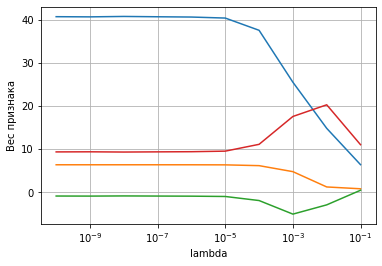

In [8]:
n = 10
lamda_list = np.logspace(-n, -1, n)
coeffs = np.zeros((len(lamda_list), X_st.shape[1]))

for n, val in enumerate(lamda_list):
    W, MSE = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[n, :] = W
    
    print(f'lambda: {val}, weights: {W}, error: {round(MSE, 2)}')

for i in range(X_st.shape[1]):
    plt.semilogx(lamda_list, coeffs[:, i])
    
plt.xlabel('lambda')
plt.ylabel('Вес признака')
plt.grid(True);

Вывод: чем lambda меньше, тем модель медленее абучается

2- Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [14]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = W.copy()
        
        
        # В зависимости от знака веса, если минус то умнажаем на lambda -1, 
        # а если плюс то просто на +1
        
        for n, val in enumerate(W):
            if val < 0:
                dReg[n] = reg * (-1) # градиент регуляризации
            elif val > 0:
                dReg[n] = reg
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [15]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [3.47593473 0.48512301 0.29961195 2.53137169], error 2964.7658586568755
Iter: 500, weights: [32.94478161  6.22342868 -4.07708761 13.70231712], error 28.493538572089925
Iter: 1000, weights: [38.56743041  6.26938435 -1.81302102 10.4878409 ], error 25.456541184026786
Iter: 1500, weights: [40.77142349  6.28562272 -0.92374474  9.22775703], error 24.98956457045476
Iter: 2000, weights: [41.63555114  6.29198842 -0.57508199  8.7337113 ], error 24.917729292998658
Iter: 2500, weights: [41.97435294  6.29448425 -0.43838047  8.54000892], error 24.906666735919927
Iter: 3000, weights: [42.10718825  6.29546279 -0.38478338  8.46406329], error 24.90495837490623
Iter: 3500, weights: [42.15926949  6.29584646 -0.36376937  8.434287  ], error 24.904692702652785
Iter: 4000, weights: [42.17968918  6.29599688 -0.35553033  8.4226125 ], error 24.90465066334224
Iter: 4500, weights: [42.18769521  6.29605586 -0.35230001  8.41803523], error 24.904643730618794
Final MSE: 24.90464248049083
